In [65]:
import pandas as pd
from scipy.stats import skew,kurtosis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Function to read the data, get the results in DF
def get_data(file):
   input_df = pd.read_csv(file, sep=" ", names=["input_vector"])
   return input_df

data_df = get_data("/content/Data-1.txt")

In [75]:
#Function to get the statistical measures
def get_statistical_measures(input_vector):
   mean = input_vector.mean()
   median = input_vector.median()
   std_deviation =input_vector.std()
   variance = input_vector.var()
   stats_dict = {
      "Mean": mean,
      "Median": median,
      "Standard Deviation":std_deviation,
      "Variance": variance
   }
   return  stats_dict

print(get_statistical_measures(data_df))
print("Minimum = " , data_df.min())
print("Maximum = " , data_df.max())

{'Mean': input_vector    100.034851
dtype: float64, 'Median': input_vector    99.8985
dtype: float64, 'Standard Deviation': input_vector    19.990449
dtype: float64, 'Variance': input_vector    399.618064
dtype: float64}
Minimum =  input_vector    11.328
dtype: float64
Minimum =  input_vector    188.69
dtype: float64


In [63]:
#Function to get the quartiles
def get_quartiles(input_vector):
    q1,q2, q3 = input_vector.quantile([0.25,0.5,0.75])
    iqr = q3 - q1
    quartiles_dict ={
        "Q1":q1,
        "Q2":q2,
        "Q3":q3,
        "IQR":iqr
        }
    return quartiles_dict

print(get_quartiles(data_df["input_vector"]))

{'Q1': 86.58075, 'Q2': 99.8985, 'Q3': 113.47, 'IQR': 26.889250000000004}


       input_vector
540         159.760
688          45.209
995         158.440
1047        161.590
1194         44.641
...             ...
98977        29.066
99445        43.881
99549        43.523
99675        41.562
99907       177.930

[696 rows x 1 columns]


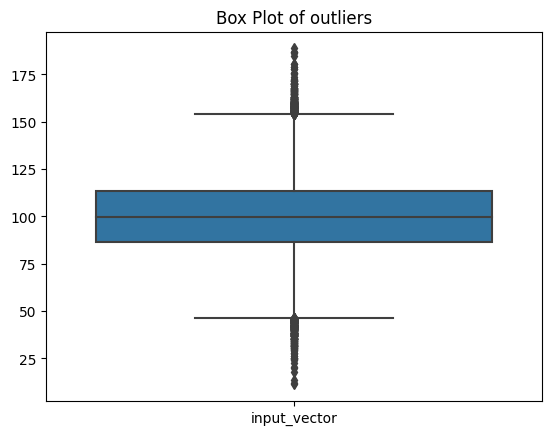

In [79]:
#get if the data set has outliers,the outliers are the points less that q1-1.5iqr, or larger than q3+1.5iqr
def get_outliers(input_vector,q1, q3,iqr):
    outliers = input_vector[((input_vector<(q1-1.5*iqr)) | (input_vector>(q3+1.5*iqr)))]
    return outliers.dropna()

quartiles = get_quartiles(data_df["input_vector"])
print(get_outliers(data_df,quartiles["Q1"],quartiles["Q3"],quartiles["IQR"]))
# Box plot to visualize outliers
sns.boxplot(data=data_df)
plt.title("Box Plot of outliers")
plt.show()

{'skewness': array([0.00265619]), 'kurtosis': array([0.00831677])}


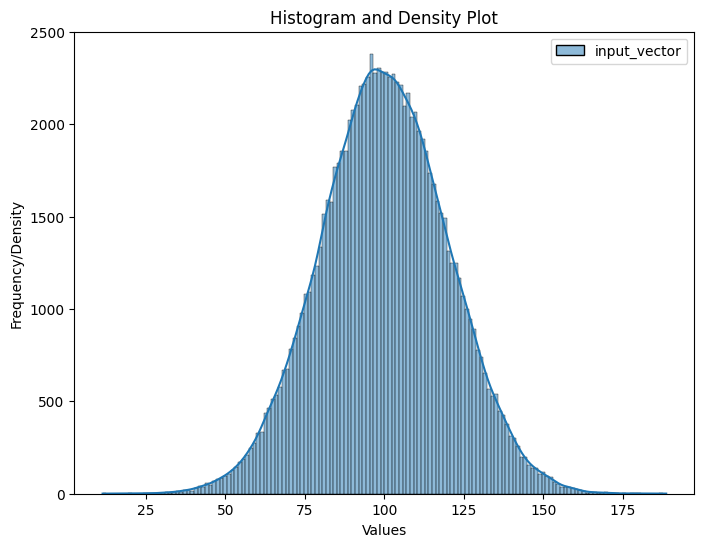

In [69]:
#Get skewness, and Kurtosis values
def get_skewness_and_Kurtosis(input_vector):
   skewness = skew(input_vector)
   kurt = kurtosis(input_vector)
   dict ={
      "skewness" :skewness,
      "kurtosis" :kurt
   }
   return dict
print(get_skewness_and_Kurtosis(data_df))

#Best way to visualize skewness and kurtosis is plotting histograms and density plots
plt.figure(figsize=(8, 6))
sns.histplot(data_df, kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Values')
plt.ylabel('Frequency/Density')
plt.show()

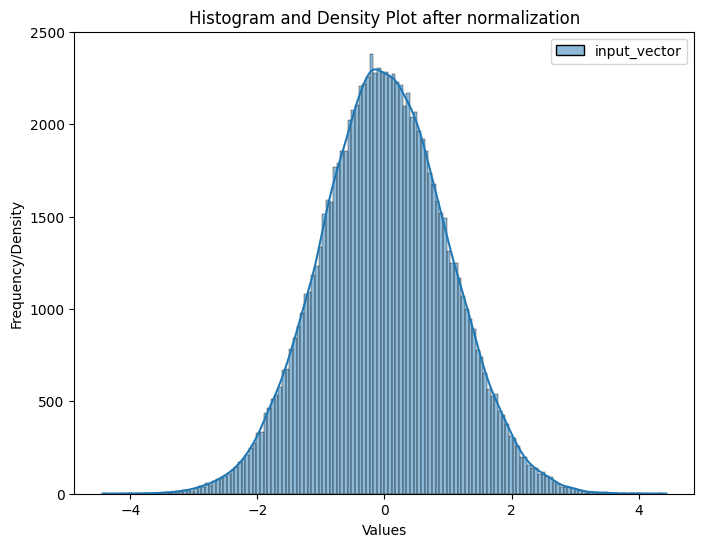

In [68]:
#Normalize
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the DataFrame using Z-score standardization
df_standardized = scaler.fit_transform(data_df)

# Create a new DataFrame with the standardized values
df_normalized = pd.DataFrame(df_standardized, columns=data_df.columns)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized, kde=True)
plt.title('Histogram and Density Plot after normalization')
plt.xlabel('Values')
plt.ylabel('Frequency/Density')
plt.show()
